# Visualization with hierarchical clustering and t-SNE
> In this chapter, you'll learn about two unsupervised learning techniques for data visualization, hierarchical clustering and t-SNE. Hierarchical clustering merges the data samples into ever-coarser clusters, yielding a tree visualization of the resulting cluster hierarchy. t-SNE maps the data samples into 2d space so that the proximity of the samples to one another can be visualized.
> 
- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 2 exercises "Unsupervised Learning in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Visualizing hierarchies

### How many merges?


<p>If there are 5 data samples, how many merge operations will occur in a hierarchical clustering? (To help answer this question, think back to the video, in which Ben walked through an example of hierarchical clustering using 6 countries.)</p>

<pre>
Possible Answers

<b>4 merges.</b>

3 merges.


This can't be known in advance.

</pre>

**Well done! With 5 data samples, there would be 4 merge operations, and with 6 data samples, there would be 5 merges, and so on.**

### Hierarchical clustering of the grain data


<p>In the video, you learned that the SciPy <code>linkage()</code> function performs hierarchical clustering on an array of samples.  Use the <code>linkage()</code> function to obtain a hierarchical clustering of the grain samples, and use <code>dendrogram()</code> to visualize the result.  A sample of the grain measurements is provided in the array <code>samples</code>, while the variety of each grain sample is given by the list <code>varieties</code>.</p>

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/2-unsupervised-learning-in-python/datasets/seeds_samples.csv')

In [28]:
samples = df.iloc[:, :-1].values
varieties = df.iloc[:, -1].values

Instructions
<ul>
<li>Import:<ul>
<li><code>linkage</code> and <code>dendrogram</code> from <code>scipy.cluster.hierarchy</code>.</li>
<li><code>matplotlib.pyplot</code> as <code>plt</code>.</li></ul></li>
<li>Perform hierarchical clustering on <code>samples</code> using the <code>linkage()</code> function with the <code>method='complete'</code> keyword argument. Assign the result to <code>mergings</code>.</li>
<li>Plot a dendrogram using the <code>dendrogram()</code> function on <code>mergings</code>. Specify the keyword arguments <code>labels=varieties</code>, <code>leaf_rotation=90</code>, and <code>leaf_font_size=6</code>.</li>
</ul>

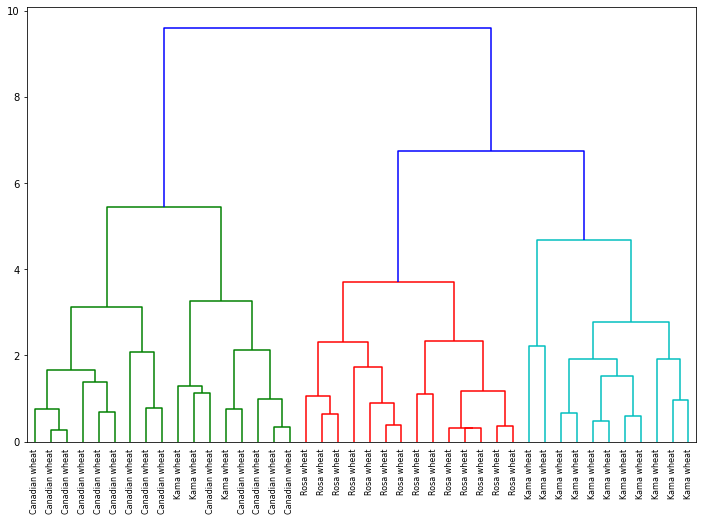

In [32]:
# Perform the necessary imports
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(12, 8))
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=8,
)
plt.show()

**Dendrograms are a great way to illustrate the arrangement of the clusters produced by hierarchical clustering.**

### Hierarchies of stocks

<div class=""><p>In chapter 1, you used k-means clustering to cluster companies according to their stock price movements. Now, you'll perform hierarchical clustering of the companies.  You are given a NumPy array of price movements <code>movements</code>, where the rows correspond to companies, and a list of the company names <code>companies</code>.  SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the <code>normalize()</code> function from <code>sklearn.preprocessing</code> instead of <code>Normalizer</code>.</p>
<p><code>linkage</code> and <code>dendrogram</code> have already been imported from <code>scipy.cluster.hierarchy</code>, and PyPlot has been imported as <code>plt</code>.</p></div>

In [97]:
df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/2-unsupervised-learning-in-python/datasets/movements.csv', index_col=0)

In [98]:
df = df.reset_index()
companies = df['companies'].values
movements = df.drop('companies', 1).values

Instructions
<ul>
<li>Import <code>normalize</code> from <code>sklearn.preprocessing</code>.</li>
<li>Rescale the price movements for each stock by using the <code>normalize()</code> function on <code>movements</code>.</li>
<li>Apply the <code>linkage()</code> function to <code>normalized_movements</code>, using <code>'complete'</code> linkage, to calculate the hierarchical clustering. Assign the result to <code>mergings</code>.</li>
<li>Plot a dendrogram of the hierarchical clustering, using the list <code>companies</code> of company names as the <code>labels</code>. In addition, specify the <code>leaf_rotation=90</code>, and <code>leaf_font_size=6</code> keyword arguments as you did in the previous exercise.</li>
</ul>

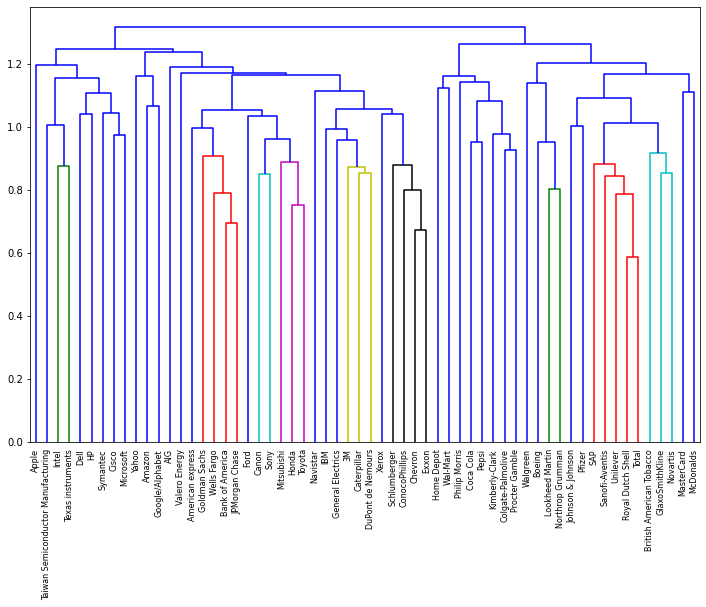

In [99]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(mergings,
           labels=companies,
           leaf_rotation=90,
           leaf_font_size=8,
)
plt.show()

**You can produce great visualizations such as this with hierarchical clustering, but it can be used for more than just visualizations. You'll find out more about this in the next video!**

## Cluster labels in hierarchical clustering


### Which clusters are closest?


<div class=""><p>In the video, you learned that the linkage method defines how the distance between clusters is measured.
In <em>complete</em> linkage, the distance between clusters is the distance between the <em>furthest</em> points of the clusters.
In <em>single</em> linkage, the distance between clusters is the distance between the <em>closest</em> points of the clusters.</p>
<p>Consider the three clusters in the diagram.  Which of the following statements are true?</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/course_2997/datasets/cluster_linkage_riddle.png"></p>
<p><strong>A.</strong> In single linkage, Cluster 3 is the closest to Cluster 2.</p>
<p><strong>B.</strong> In complete linkage, Cluster 1 is the closest to Cluster 2.</p></div>

<pre>
Possible Answers

Neither A nor B.


A only.


<b>Both A and B.</b>

</pre>

### Different linkage, different hierarchical clustering!


<div class=""><p>In the video, you saw a hierarchical clustering of the voting countries at the Eurovision song contest using <code>'complete'</code> linkage. Now, perform a hierarchical clustering of the voting countries with <code>'single'</code> linkage, and compare the resulting dendrogram with the one in the video.  Different linkage, different hierarchical clustering!</p>
<p>You are given an array <code>samples</code>. Each row corresponds to a voting country, and each column corresponds to a performance that was voted for. The list <code>country_names</code> gives the name of each voting country. This dataset was obtained from  <a href="http://www.eurovision.tv/page/results" target="_blank" rel="noopener noreferrer">Eurovision</a>.</p></div>

In [101]:
df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/2-unsupervised-learning-in-python/datasets/eurovision_samples.csv')

In [110]:
country_names = list(df['country_names'])
samples = df.iloc[:, :-1].values

Instructions
<ul>
<li>Import <code>linkage</code> and <code>dendrogram</code> from <code>scipy.cluster.hierarchy</code>.</li>
<li>Perform hierarchical clustering on <code>samples</code> using the <code>linkage()</code> function with the <code>method='single'</code> keyword argument. Assign the result to <code>mergings</code>.</li>
<li>Plot a dendrogram of the hierarchical clustering, using the list <code>country_names</code> as the <code>labels</code>. In addition, specify the <code>leaf_rotation=90</code>, and <code>leaf_font_size=6</code> keyword arguments as you have done earlier.</li>
</ul>

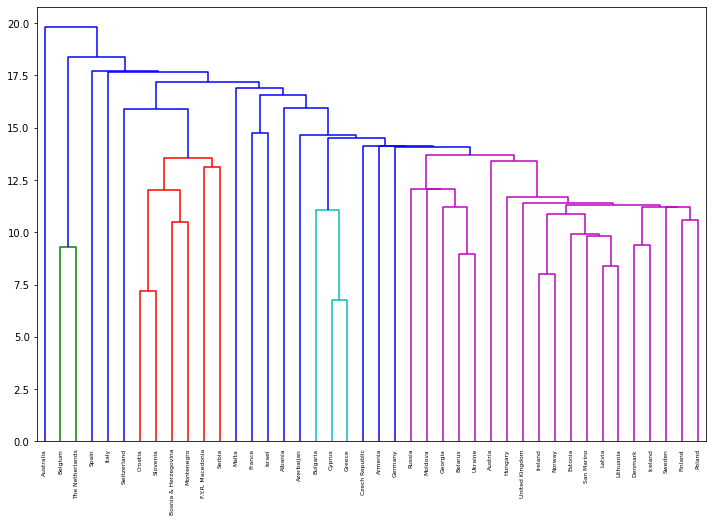

In [112]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Calculate the linkage: mergings
mergings = linkage(samples, method='single')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(mergings,
    labels=country_names,
    leaf_rotation=90,
    leaf_font_size=6)
plt.show()

**As you can see, performing single linkage hierarchical clustering produces a different dendrogram!**

### Intermediate clusterings


<p>Displayed on the right is the dendrogram for the hierarchical clustering of the grain samples that you computed earlier. If the hierarchical clustering were stopped at height 6 on the dendrogram, how many clusters would there be?</p>

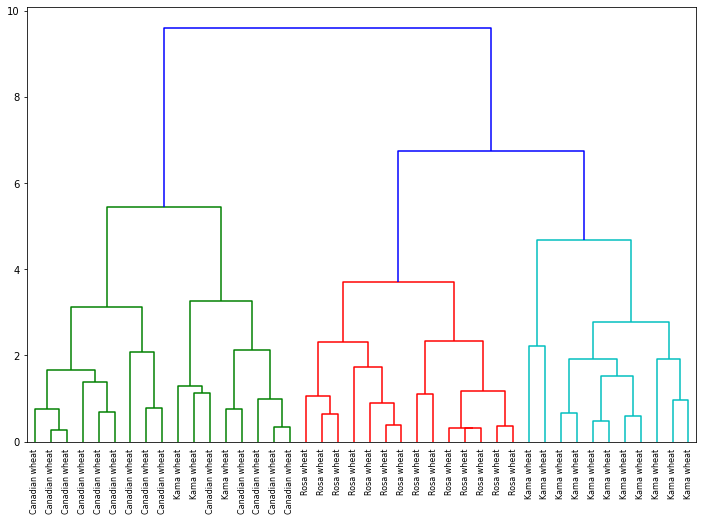

In [114]:
#@title ⠀ { display-mode: "form" }
df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/2-unsupervised-learning-in-python/datasets/seeds_samples.csv')
samples = df.iloc[:, :-1].values
varieties = df.iloc[:, -1].values

# Perform the necessary imports
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(12, 8))
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=8,
)
plt.show()

<pre>
Possible Answers

1.

<b>3.</b>

As many as there were at the beginning.
</pre>

### Extracting the cluster labels


<div class=""><p>In the previous exercise, you saw that the intermediate clustering of the grain samples at height 6 has 3 clusters. Now, use the <code>fcluster()</code> function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.</p>
<p>The hierarchical clustering has already been performed and <code>mergings</code> is the result of the <code>linkage()</code> function. The list <code>varieties</code> gives the variety of each grain sample.</p></div>

Instructions
<ul>
<li>Import:<ul>
<li><code>pandas</code> as <code>pd</code>.</li>
<li><code>fcluster</code> from <code>scipy.cluster.hierarchy</code>.</li></ul></li>
<li>Perform a flat hierarchical clustering by using the <code>fcluster()</code> function on <code>mergings</code>. Specify a maximum height of <code>6</code> and the keyword argument <code>criterion='distance'</code>.</li>
<li>Create a DataFrame <code>df</code> with two columns named <code>'labels'</code> and <code>'varieties'</code>, using <code>labels</code> and <code>varieties</code>, respectively, for the column values.  This has been done for you.</li>
<li>Create a cross-tabulation <code>ct</code> between <code>df['labels']</code> and <code>df['varieties']</code> to count the number of times each grain variety coincides with each cluster label.</li>
</ul>

In [115]:
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, t=6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                      14           3           0
2                       0           0          14
3                       0          11           0


**you've now mastered the fundamentals of k-Means and agglomerative hierarchical clustering. Next, you'll learn about t-SNE, which is a powerful tool for visualizing high dimensional data.**

## t-SNE for 2-dimensional maps


### t-SNE visualization of grain dataset


<p>In the video, you saw t-SNE applied to the iris dataset. In this exercise, you'll apply t-SNE to the grain samples data and inspect the resulting t-SNE features using a scatter plot. You are given an array <code>samples</code> of grain samples and a list <code>variety_numbers</code> giving the variety number of each grain sample.</p>

In [152]:
df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/2-unsupervised-learning-in-python/datasets/seeds_210x8.csv')

samples = df.iloc[:, :-1].values
variety_numbers = df.iloc[:, -1].values

Instructions
<ul>
<li>Import <code>TSNE</code> from <code>sklearn.manifold</code>.</li>
<li>Create a TSNE instance called <code>model</code> with <code>learning_rate=200</code>.</li>
<li>Apply the <code>.fit_transform()</code> method of <code>model</code> to <code>samples</code>. Assign the result to <code>tsne_features</code>.</li>
<li>Select the column <code>0</code> of <code>tsne_features</code>. Assign the result to <code>xs</code>.</li>
<li>Select the column <code>1</code> of <code>tsne_features</code>. Assign the result to <code>ys</code>.</li>
<li>Make a scatter plot of the t-SNE features <code>xs</code> and <code>ys</code>. To color the points by the grain variety, specify the additional keyword argument <code>c=variety_numbers</code>.</li>
</ul>

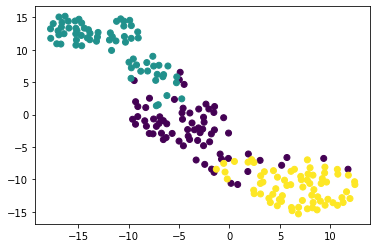

In [153]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=variety_numbers)
plt.show()

**As you can see, the t-SNE visualization manages to separate the 3 varieties of grain samples. But how will it perform on the stock data? You'll find out in the next exercise!**

### A t-SNE map of the stock market


<p>t-SNE provides great visualizations when the individual samples can be labeled.  In this exercise, you'll apply t-SNE to the company stock price data. A scatter plot of the resulting t-SNE features, labeled by the company names, gives you a map of the stock market!  The stock price movements for each company are available as the array <code>normalized_movements</code> (these have already been normalized for you). The list <code>companies</code> gives the name of each company.  PyPlot (<code>plt</code>) has been imported for you.</p>

Instructions
<ul>
<li>Import <code>TSNE</code> from <code>sklearn.manifold</code>.</li>
<li>Create a TSNE instance called <code>model</code> with <code>learning_rate=50</code>.</li>
<li>Apply the <code>.fit_transform()</code> method of <code>model</code> to <code>normalized_movements</code>. Assign the result to <code>tsne_features</code>.</li>
<li>Select column <code>0</code> and column <code>1</code> of <code>tsne_features</code>.</li>
<li>Make a scatter plot of the t-SNE features <code>xs</code> and <code>ys</code>. Specify the additional keyword argument <code>alpha=0.5</code>.</li>
<li>Code to label each point with its company name has been written for you using <code>plt.annotate()</code>, so just hit 'Submit Answer' to see the visualization!</li>
</ul>

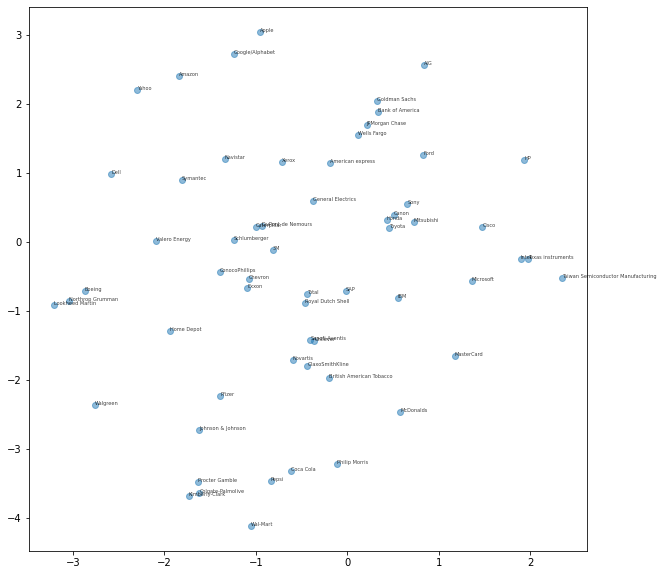

In [166]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()

**It's visualizations such as this that make t-SNE such a powerful tool for extracting quick insights from high dimensional data.**